In [1]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
def evaluate_model(X_train, X_test, y_train, y_test):
    """Fit a linear model and return R², MSE, and RMSE."""
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return {
        'r2': r2_score(y_test, y_pred),
        'mse': mse,
        'rmse': sqrt(mse),
        'coefs': model.coef_,
        'intercept': model.intercept_
    }

In [3]:
data = fetch_california_housing(as_frame=True)
df = data.frame

In [4]:
feature_names = ['MedInc', 'AveRooms', 'AveBedrms', 'Population']
X = df[feature_names].values
y = df['MedHouseVal'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
results_raw = evaluate_model(X_train, X_test, y_train, y_test)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [8]:
results_scaled = evaluate_model(X_train_scaled, X_test_scaled, y_train, y_test)

In [9]:
print("=== Model Performance Comparison ===\n")
print("Before Scaling:")
print(f"  R²   : {results_raw['r2']:.4f}")
print(f"  MSE  : {results_raw['mse']:.4f}")
print(f"  RMSE : {results_raw['rmse']:.4f}\n")
print("After Scaling:")
print(f"  R²   : {results_scaled['r2']:.4f}")
print(f"  MSE  : {results_scaled['mse']:.4f}")
print(f"  RMSE : {results_scaled['rmse']:.4f}\n")

=== Model Performance Comparison ===

Before Scaling:
  R²   : 0.4859
  MSE  : 0.6737
  RMSE : 0.8208

After Scaling:
  R²   : 0.4859
  MSE  : 0.6737
  RMSE : 0.8208



In [10]:
print("Feature coefficients (absolute values):")
print("Feature       Before Scaling    After Scaling")
for name, c_raw, c_scaled in zip(feature_names, results_raw['coefs'], results_scaled['coefs']):
    print(f"{name:>12}    {abs(c_raw):>14.4f}    {abs(c_scaled):>13.4f}")

Feature coefficients (absolute values):
Feature       Before Scaling    After Scaling
      MedInc            0.5432           1.0343
    AveRooms            0.2478           0.5917
   AveBedrms            1.1714           0.5074
  Population            0.0000           0.0418


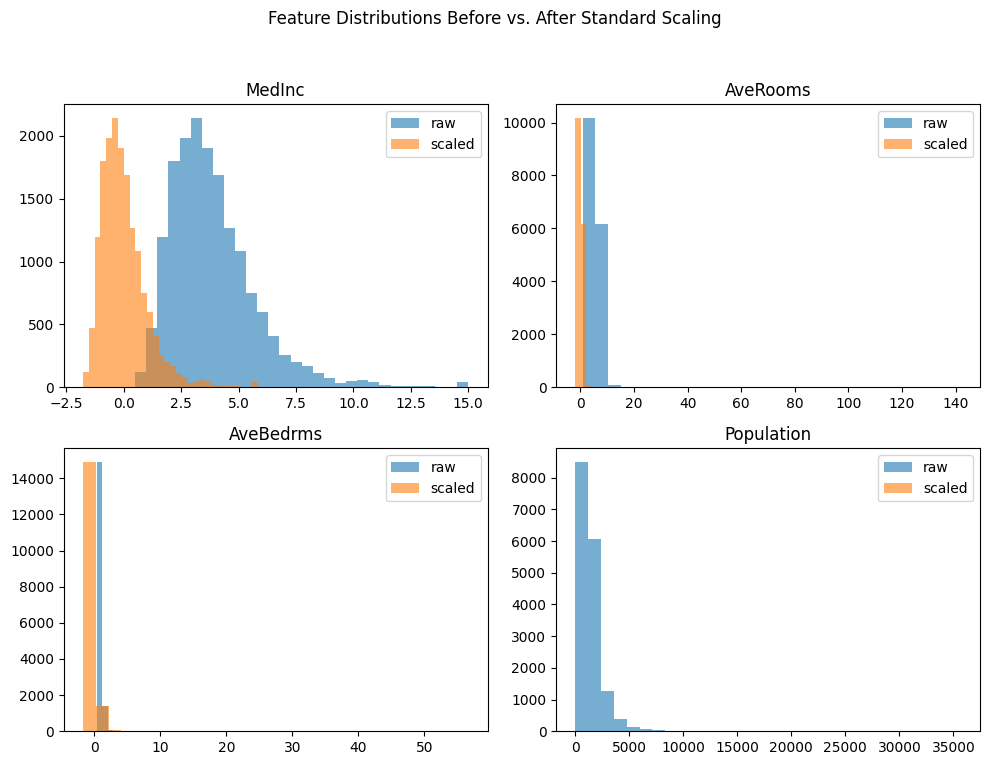

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
for i, ax in enumerate(axes.ravel()):
    feature = feature_names[i]
    ax.hist(X_train[:, i], bins=30, alpha=0.6, label='raw')
    ax.hist(X_train_scaled[:, i], bins=30, alpha=0.6, label='scaled')
    ax.set_title(feature)
    ax.legend()
plt.suptitle("Feature Distributions Before vs. After Standard Scaling")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()